## Minimal code for StateMap

In [1]:
import trimap
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import rbf_kernel
import igraph as ig
import leidenalg as la
import matplotlib.pyplot as plt

In [2]:
# Load data
chronos = pd.read_csv("./data/CRISPR_gene_effect.csv",index_col=0)
chronos.columns = [c.split()[0].upper() + '_Chronos' for c in chronos.columns]
expression = pd.read_csv("./data/CCLE_expression.csv", index_col=0)
expression.columns = [c.split()[0].upper()+'_Expression' for c in expression.columns]
sample_info = pd.read_csv("./data/sample_info.csv", index_col=0)
ch_ex = chronos.merge(expression, right_index=True, left_index=True).dropna()

In [3]:
#Data Selection and Scaling
gene_chr=['AMOTL2', 'KIRREL1', 'NF2', 'PDCD10', 'RNF146', 'TAOK1', 'PTPN14', 'MAP4K4', 'FRYL',  'LATS2',  'NRP1']
gene_exp=['YAP1','WWTR1','CCN1','CCN2']

features = [gene + '_Chronos' for gene in gene_chr] + [gene + '_Expression' for gene in gene_exp] 
scaled_data = StandardScaler().fit_transform(ch_ex[features]) 

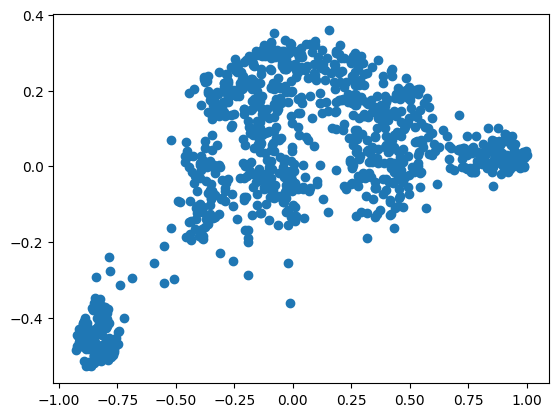

In [68]:
reducer = trimap.TRIMAP(n_dims=2, n_outliers=10, n_inliers=10)
embedding = reducer.fit_transform(scaled_data)
embedding = embedding - np.mean(embedding,axis=0)
embedding = embedding / np.max(np.abs(embedding)) 
plt.scatter(embedding[:, 0], embedding[:, 1])

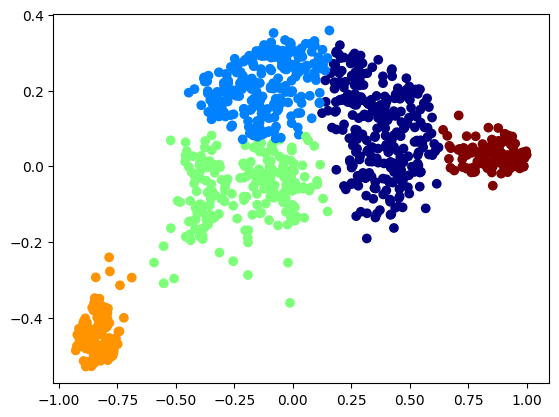

In [69]:
#Leiden clustering
GAMMA = 30
RESOLUTION = 1

W_rbf = rbf_kernel(embedding, gamma=GAMMA)
W_rbf_symmetric = (W_rbf + W_rbf.T) / 2
G_igraph = ig.Graph.Weighted_Adjacency(W_rbf_symmetric, mode='undirected')

partition = la.find_partition(
            G_igraph,
            la.RBConfigurationVertexPartition,
            weights='weight',
            resolution_parameter=RESOLUTION,
            seed=0)

plt.scatter(embedding[:, 0], embedding[:, 1], c=partition.membership, cmap='jet')

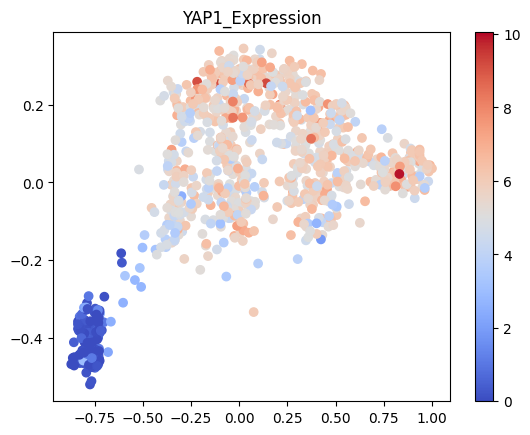

In [50]:
# Feature Visualization
feature = 'YAP1_Expression'
plt.title(feature)
plt.scatter(embedding[:, 0], embedding[:, 1], c=ch_ex[feature], cmap='coolwarm')
plt.colorbar()
